In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
filename = 'KaggleV2-May-2016_with_new_cols_may5_1338.csv'
no_show = pd.read_csv(filename, encoding='latin')

In [3]:
no_show.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,No-show,time_d,time_d_total_seconds,a_day_of_week,s_day_of_week,Neighbourhood_category,Gender_category,no_show,scheduled_hour,time_d_total_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62,JARDIM DA PENHA,0,1,0,...,No,-1 days +05:21:52.000000000,-67088.0,4,4,39,0,False,18,0
1,5.589980e+14,5642503,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,0,0,...,No,-1 days +07:51:33.000000000,-58107.0,4,4,39,1,False,16,0
2,4.262960e+12,5642549,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62,MATA DA PRAIA,0,0,0,...,No,-1 days +07:40:56.000000000,-58744.0,4,4,45,0,False,16,0
3,8.679510e+11,5642828,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8,PONTAL DE CAMBURI,0,0,0,...,No,-1 days +06:30:29.000000000,-62971.0,4,4,54,0,False,17,0
4,8.841190e+12,5642494,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56,JARDIM DA PENHA,0,1,1,...,No,-1 days +07:52:37.000000000,-58043.0,4,4,39,0,False,16,0


In [76]:
feature_set = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', \
            'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_seconds']

tree_depth = [2,3,4]
num_trees = [10, 20, 50, 100]
no_show_weight = 4  #what's a good value for this? 
max_features = None #auto = sqrt(N) or None= N, where N = len(features)
fold_count = 10


In [77]:
X = no_show.as_matrix(columns=feature_set)
y = no_show['no_show'].values
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [78]:
clf = RandomForestClassifier(n_estimators = 50, max_features = max_features, max_depth = 10, class_weight={0:1,1:no_show_weight})

In [79]:
#fold_count = 5
#scores = cross_val_score(clf, X, y, cv=fold_count) 

In [80]:
scores

array([0.79625441, 0.79616394, 0.78797612, 0.79751188, 0.79741223])

In [81]:
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

misclassified_points = (y_test != y_pred).sum()
accuracy = (X_test.shape[0] - float(misclassified_points)) / X_test.shape[0]*100
fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
auc = roc_auc_score(y_test, y_proba[:,1])


In [82]:
print('accuracy = {}'.format(accuracy))
print('tree = {}'.format(clf))
print('AUC = {}'.format(auc))
print('feature count = {}'.format(len(feature_set)))
print('feature set = {}'.format(feature_set))


accuracy = 60.598932416538496
tree = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 4},
            criterion='gini', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
AUC = 0.7386293267821616
feature count = 12
feature set = ['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Gender_category', 'scheduled_hour', 's_day_of_week', 'a_day_of_week', 'time_d_total_seconds']


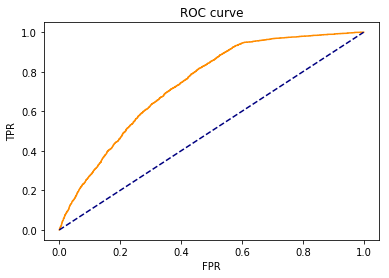

In [83]:
plt.clf()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

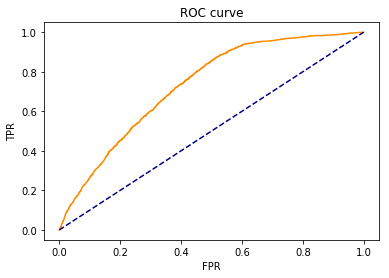

In [64]:
#class weight = 5

plt.clf()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [58]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
graph